In [1]:
#importar librerias pandas 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_excel('Detalle precios y productos fabricados 2022 limpio.xlsx')
data.head()

,Unnamed: 0,CVE_DOC,FECHA_DOC,NOMBRE_VENDEDOR,NOMBRE_CLIENTE,CANT,CVE_ART,DESCR,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,0,F37034,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,1,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1,F37036,2022-01-05,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,1,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,2,F37041,2022-01-05,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,7,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,3,F37042,2022-01-05,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,1,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,4,F37043,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,2,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,172.41,101.71,101.71,344.83,203.42,70.71,141.41


In [3]:
data=data.drop(columns='Unnamed: 0')
data.head()

,CVE_DOC,FECHA_DOC,NOMBRE_VENDEDOR,NOMBRE_CLIENTE,CANT,CVE_ART,DESCR,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,F37034,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,1,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,F37036,2022-01-05,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,1,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,F37041,2022-01-05,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,7,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,F37042,2022-01-05,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,1,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,F37043,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,2,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,172.41,101.71,101.71,344.83,203.42,70.71,141.41


In [4]:
#verificamos informacion del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CVE_DOC                    1426 non-null   object        
 1   FECHA_DOC                  1426 non-null   datetime64[ns]
 2   NOMBRE_VENDEDOR            1426 non-null   object        
 3   NOMBRE_CLIENTE             1426 non-null   object        
 4   CANT                       1426 non-null   int64         
 5   CVE_ART                    1426 non-null   object        
 6   DESCR                      1426 non-null   object        
 7   PRECIO_UNITARIO            1426 non-null   float64       
 8   COSTO_UNITARIO             1426 non-null   float64       
 9   COSTO_UNITARIO_CALCULADO   1426 non-null   float64       
 10  SUBTOTAL_PARTIDA           1426 non-null   float64       
 11  COSTO_TOTAL_CALCULADO      1426 non-null   float64       
 12  MARGEN

In [11]:
#creo 2 dataframe para podere procesar los otliers
cualitativas= data.iloc[ :,[0,2,3,5,6]] 
cuantitativas=data.iloc[ : , [1,4,7,8,9,10,11,12,13]]

<Figure size 1500x800 with 0 Axes>

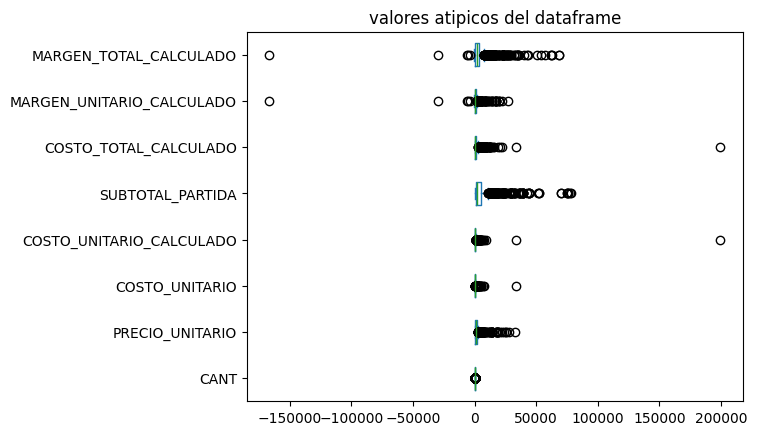

In [12]:
#realizamos diagrama de caja o bigote de cada columna del dataframe 
fig=plt.figure(figsize=(15,8))
cuantitativas.plot(kind='box',vert=False)
plt.title("valores atipicos del dataframe")
plt.show()

**Procedimiento de cuantiles para sustituir outliners**

In [13]:
y=cuantitativas
percentile25=y.quantile(0.25)#Q1
percentile75=y.quantile(0.75)#Q3
iqr=percentile75-percentile25
Limite_Superior_iqr=percentile75+1.5*iqr
Limite_Inferior_iqr=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido FECHA_DOC                    2023-06-26 00:00:00
CANT                                         8.5
PRECIO_UNITARIO                       2954.86625
COSTO_UNITARIO                            567.95
COSTO_UNITARIO_CALCULADO               807.81375
SUBTOTAL_PARTIDA                      10783.5125
COSTO_TOTAL_CALCULADO                  2971.3625
MARGEN_UNITARIO_CALCULADO             2089.94625
MARGEN_TOTAL_CALCULADO                 7807.5975
dtype: object
Limite inferior permitido FECHA_DOC                    2021-06-20 00:00:00
CANT                                        -3.5
PRECIO_UNITARIO                       -927.40375
COSTO_UNITARIO                           -340.77
COSTO_UNITARIO_CALCULADO              -340.87625
SUBTOTAL_PARTIDA                      -4946.7875
COSTO_TOTAL_CALCULADO                 -1506.2575
MARGEN_UNITARIO_CALCULADO             -621.22375
MARGEN_TOTAL_CALCULADO                -3594.4225
dtype: object


In [14]:
#obtenemos datos limpios del dataframe
data3_iqr=cuantitativas[(y<=Limite_Superior_iqr) & (y>=Limite_Inferior_iqr)]
data3_iqr

,FECHA_DOC,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,2022-01-05,1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,2022-01-05,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,2022-01-05,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,2022-01-05,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2022-01-05,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...,...
1421,2022-12-23,6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,2022-12-23,6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,2022-12-23,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,2022-12-23,1.0,NaN,NaN,NaN,5909.84,1884.35,NaN,4025.49


In [15]:
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

FECHA_DOC                      0
CANT                         169
PRECIO_UNITARIO              127
COSTO_UNITARIO               128
COSTO_UNITARIO_CALCULADO     144
SUBTOTAL_PARTIDA             159
COSTO_TOTAL_CALCULADO        162
MARGEN_UNITARIO_CALCULADO    132
MARGEN_TOTAL_CALCULADO       168
dtype: int64

In [16]:
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,FECHA_DOC,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,2022-01-05,1.000000,434.480000,52.800000,52.800000,434.480000,52.80,381.680000,381.680000
1,2022-01-05,1.000000,1264.050000,327.180000,327.180000,1264.050000,327.18,936.870000,936.870000
2,2022-01-05,7.000000,551.610000,177.680000,177.680000,3861.290000,1243.73,373.940000,2617.560000
3,2022-01-05,1.000000,140.000000,38.960000,38.960000,140.000000,38.96,101.040000,101.040000
4,2022-01-05,2.000000,172.410000,101.710000,101.710000,344.830000,203.42,70.710000,141.410000
...,...,...,...,...,...,...,...,...,...
1421,2022-12-23,6.000000,712.000000,102.310000,102.310000,4272.000000,613.88,609.690000,3658.120000
1422,2022-12-23,6.000000,718.600000,104.690000,104.690000,4311.600000,628.12,613.910000,3683.480000
1423,2022-12-23,3.000000,2182.350000,0.000000,596.550000,6547.050000,1789.64,1585.800000,4757.410000
1424,2022-12-23,1.000000,942.747814,107.983598,219.885148,5909.840000,1884.35,684.809946,4025.490000


In [17]:
#el dataframe cuantitativo limpio con el dataframe caulitativo
Datos_limpios=pd.concat([cualitativas,data4_iqr],axis=1)
Datos_limpios

,CVE_DOC,NOMBRE_VENDEDOR,NOMBRE_CLIENTE,CVE_ART,DESCR,FECHA_DOC,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,F37034,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",2022-01-05,1.000000,434.480000,52.800000,52.800000,434.480000,52.80,381.680000,381.680000
1,F37036,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",2022-01-05,1.000000,1264.050000,327.180000,327.180000,1264.050000,327.18,936.870000,936.870000
2,F37041,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,2022-01-05,7.000000,551.610000,177.680000,177.680000,3861.290000,1243.73,373.940000,2617.560000
3,F37042,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,2022-01-05,1.000000,140.000000,38.960000,38.960000,140.000000,38.96,101.040000,101.040000
4,F37043,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,2022-01-05,2.000000,172.410000,101.710000,101.710000,344.830000,203.42,70.710000,141.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,F39834,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,CS12F1040A00,"CAS INOX 1/2""ØX3"" 400W 127V EXT.30CM",2022-12-23,6.000000,712.000000,102.310000,102.310000,4272.000000,613.88,609.690000,3658.120000
1422,F39834,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,CS12H1050A00,"CAS INOX 1/2""ØX4"" 500W 127V EXT30CM",2022-12-23,6.000000,718.600000,104.690000,104.690000,4311.600000,628.12,613.910000,3683.480000
1423,F39835,LETICIA RAMIREZ HERNANDEZ,SEVEN DAYS ALL SPORT,TUE00394,"TUB INOX 5/16""ØX300MM 5300W 220V ""M"" ESP",2022-12-23,3.000000,2182.350000,0.000000,596.550000,6547.050000,1789.64,1585.800000,4757.410000
1424,F39837,LETICIA RAMIREZ HERNANDEZ,REVUELTA MONTECARLO,TUA00470,"TUB INOX 1/2""ØX500MM 10KW 220V 2 1/2""NPT",2022-12-23,1.000000,942.747814,107.983598,219.885148,5909.840000,1884.35,684.809946,4025.490000


In [18]:
valores_nulos=Datos_limpios.isnull().sum().sum()
valores_nulos

np.int64(0)

In [25]:
Datos_limpios.to_excel('Detalle precios y productos fabricados 2022 limpio cuantiles.xlsx')

**Procedimiento "DESVIACION ESTANDAR" PARA ELIMINAR OUTLINERS EN DATAFRAME**

In [19]:
#METODO APLICANDO DESVIACION ESTANDAR. ENCUENTRO LOS VALORES
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite Superior permitido", Limite_Superior)
print("Limite Inferior permitido", Limite_Inferior)

Limite Superior permitido FECHA_DOC                    2023-04-29 09:31:00.868613470
CANT                                             22.531793
PRECIO_UNITARIO                                9533.970813
COSTO_UNITARIO                                 3313.473534
COSTO_UNITARIO_CALCULADO                      16686.790475
SUBTOTAL_PARTIDA                               31402.66381
COSTO_TOTAL_CALCULADO                         18629.377526
MARGEN_UNITARIO_CALCULADO                      16001.39844
MARGEN_TOTAL_CALCULADO                        28691.369713
dtype: object
Limite Inferior permitido FECHA_DOC                    2021-08-16 19:09:42.890153122
CANT                                            -14.324219
PRECIO_UNITARIO                               -6499.204684
COSTO_UNITARIO                                 -2821.61425
COSTO_UNITARIO_CALCULADO                     -15603.765678
SUBTOTAL_PARTIDA                             -21404.897036
COSTO_TOTAL_CALCULADO                        -158

In [20]:
#obtenemos datos y los outliners se convierten en nulos en el DataFrame 
data3=cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,FECHA_DOC,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,2022-01-05,1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,2022-01-05,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,2022-01-05,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,2022-01-05,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2022-01-05,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...,...
1421,2022-12-23,6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,2022-12-23,6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,2022-12-23,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,2022-12-23,1.0,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49


In [21]:
#corroboramos valores atipicos de dataframe
valores_nulos=data3.isnull().sum()
valores_nulos

FECHA_DOC                     0
CANT                         28
PRECIO_UNITARIO              29
COSTO_UNITARIO               10
COSTO_UNITARIO_CALCULADO      2
SUBTOTAL_PARTIDA             36
COSTO_TOTAL_CALCULADO         5
MARGEN_UNITARIO_CALCULADO    13
MARGEN_TOTAL_CALCULADO       24
dtype: int64

In [22]:
#remplazamos valores atipicos (nulos) del dataframe con mean 
#realizamos una copia del datframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,FECHA_DOC,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,2022-01-05,1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,2022-01-05,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,2022-01-05,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,2022-01-05,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2022-01-05,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...,...
1421,2022-12-23,6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,2022-12-23,6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,2022-12-23,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,2022-12-23,1.0,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49


In [23]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

FECHA_DOC                    0
CANT                         0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

<Figure size 1500x800 with 0 Axes>

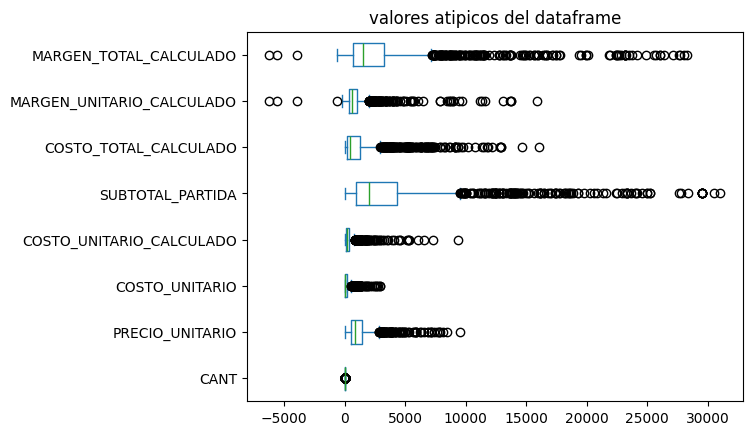

In [24]:
fig=plt.figure(figsize=(15,8))
data_clean.plot(kind='box',vert=False)
plt.title("valores atipicos del dataframe")
plt.show()